In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [2]:
import pandas as pd
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


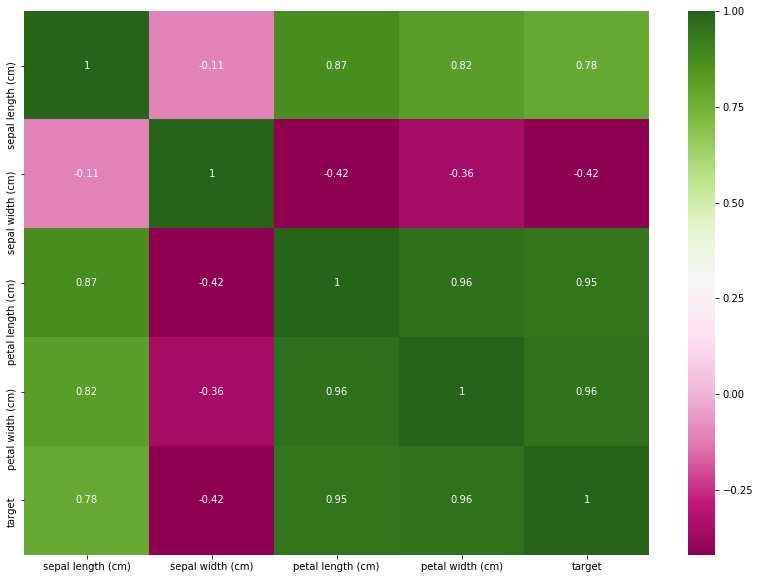

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 10))
sns.heatmap(df.astype(float).corr(), cmap = "PiYG", annot = True)

In [4]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(iris["data"], iris["target"], test_size = 0.1)

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(data_train, target_train)
pre = clf.predict(data_test)

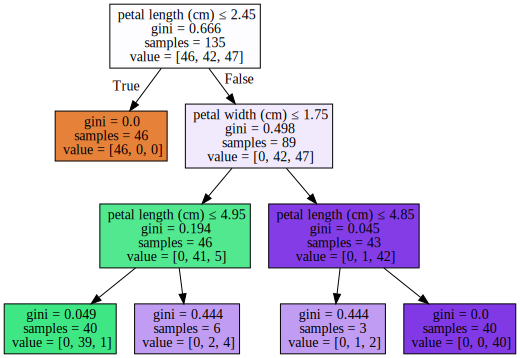

In [6]:
from sklearn.tree import export_graphviz
import graphviz
dot = export_graphviz(clf, 
                      out_file = None, 
                      feature_names = iris["feature_names"],
                      filled = True,
                      special_characters = True)
graph = graphviz.Source(dot)
graph.render("iris")
graph

In [7]:
print("我們的預測: ", pre)
print("偷偷有的答案: ", target_test)

我們的預測:  [2 0 0 0 1 0 2 1 1 2 1 1 1 1 1]
偷偷有的答案:  [2 0 0 0 1 0 2 1 1 2 1 1 1 1 1]


In [8]:
from sklearn.metrics import accuracy_score
print("正確率:", accuracy_score(target_test, pre) * 100, "%")

正確率: 100.0 %


In [9]:
clf.feature_importances_

array([0.        , 0.        , 0.60101851, 0.39898149])